In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


#### show data

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Preparing X, Y variables

In [3]:
X= df.drop(columns=['math_score'], axis=1)
X.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [4]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Pipeline for preprocessing

In [5]:
num_features = X.select_dtypes(exclude='O').columns
cat_features = X.select_dtypes(include='O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
cat_trans = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", cat_trans, cat_features),
    ("StandarScaler", num_trans, num_features)
])

In [6]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

#### Split data into train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Creat an Evaluate function to give all metrics after mdel training

In [9]:
def evaluate(original, predicted):
    mae = mean_absolute_error(original, predicted)
    rmse = root_mean_squared_error(original, predicted)
    r2 = r2_score(original, predicted)
    return mae, rmse, r2

#### Modeling

In [12]:
models = {
    "Linear_reg": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KN_reg":KNeighborsRegressor(),
    "Decision tree":DecisionTreeRegressor(),
    "Random forest":RandomForestRegressor(),
    "xgboost":XGBRegressor(),
    "ada_reg":AdaBoostRegressor()
}

models_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluation
    train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R^2 : {train_rmse:.4f}")

    print("-----------------------------------------------")

    print("Model performance for testing set")
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R^2 : {test_rmse:.4f}")
    r2_list.append(test_r2)

    print("="*35)


Linear_reg
Model performance for training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R^2 : 5.3231
-----------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R^2 : 5.3940
Lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R^2 : 6.5938
-----------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R^2 : 6.5197
Ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R^2 : 5.3233
-----------------------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R^2 : 5.3904
KN_reg
Model performance for training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R^2 : 5.7077
-------------------------------

#### Results

In [16]:
pd.DataFrame(list(zip(models_list, r2_list)),
            columns= ['Model Name', 'R^2 Score']).sort_values(by='R^2 Score', ascending=False)

Model Name  R^2 Score
2          Ridge   0.880593
0     Linear_reg   0.880433
5  Random forest   0.854185
7        ada_reg   0.843310
6        xgboost   0.827797
1          Lasso   0.825320
3         KN_reg   0.783813
4  Decision tree   0.741738

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

print(f"Accuracy of the model is: {score:.2f}")

Accuracy of the model is: 88.04


#### Plot prediction with test

Text(0, 0.5, 'Predicted')

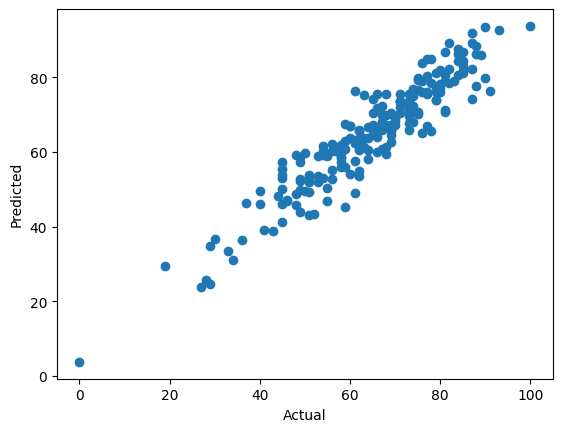

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

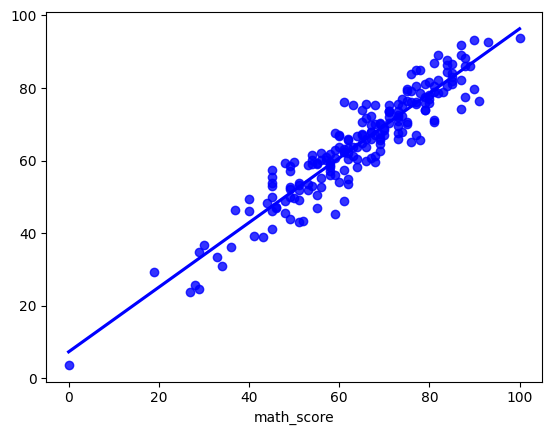

In [19]:
sns.regplot(x=y_test, y=y_pred, ci= None, color= 'blue')

#### Difference between actual and predicted values

In [21]:
pred_df = pd.DataFrame({
    "Actual Value":y_test,
    "Predicted Value":y_pred,
    "Difference":y_test - y_pred
})
pred_df.head(10)

Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
678            81        79.014024    1.985976
626            69        64.654609    4.345391
513            54        53.007919    0.992081
859            87        74.184710   12.815290
136            51        49.213538    1.786462